In [3]:
import h5py
import numpy as np
from skimage import io, transform
from torchvision import transforms, utils
data = []
sequence = []
for i in range(4):
    with h5py.File("/home/chekirou/Documents/SOLI/SoliData/dsp/6_9_22.h5", 'r') as f:
        # Data and label are numpy arrays
        data.append(f['ch{}'.format(i)][41])
        label = f['label'][41]
image = np.stack((data[0], data[1], data[2], data[3]), axis = -1)

In [35]:
image.shape
img = transform.resize(image.reshape(32,32, 4), (224, 224,4))

In [36]:
img


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [8]:
import matplotlib.pyplot as plt

In [88]:
data = data.reshape((data.shape[0], 32,32))

ValueError: cannot reshape array of size 1024 into shape (1024,32,32)

TypeError: Invalid shape () for image data

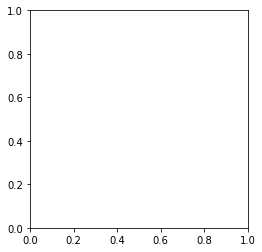

In [89]:

plt.imshow(data[0])
plt.show()

In [7]:
label[5][0]

1

In [1]:
import torch.nn

In [8]:
m = torch.nn.Softmax(dim=0)
input = torch.randn(2,3)
output = m(input)

In [9]:
output

tensor([[0.3346, 0.0495, 0.0689],
        [0.6654, 0.9505, 0.9311]])

In [ ]:
def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [53]:
import os
for filename in os.listdir("/home/chekirou/Documents/SOLI/SoliData/dsp/"):
    print(filename)

0_7_22.h5
9_0_42.h5
6_10_15.h5
6_4_4.h5
9_0_40.h5
10_3_12.h5
5_2_4.h5
10_12_1.h5
8_8_6.h5
3_4_7.h5
6_0_42.h5
8_13_19.h5
0_1_16.h5
9_4_9.h5
6_7_49.h5
7_1_38.h5
5_3_0.h5
5_4_11.h5
10_11_24.h5
0_8_9.h5
0_4_1.h5
1_1_39.h5
7_14_15.h5
0_7_34.h5
10_10_24.h5
7_11_23.h5
3_4_40.h5
9_1_31.h5
8_8_19.h5
5_4_37.h5
8_2_5.h5
8_0_29.h5
10_10_18.h5
5_0_16.h5
2_1_14.h5
8_4_0.h5
3_6_16.h5
6_4_5.h5
5_2_1.h5
0_14_24.h5
5_13_20.h5
8_0_4.h5
6_4_41.h5
6_0_32.h5
4_7_36.h5
4_5_19.h5
6_2_17.h5
11_15_111.h5
8_1_1.h5
8_3_12.h5
1_7_41.h5
8_2_14.h5
1_3_15.h5
10_1_32.h5
1_4_39.h5
6_12_22.h5
4_6_24.h5
2_5_9.h5
9_7_11.h5
3_2_9.h5
10_3_24.h5
10_1_31.h5
6_9_13.h5
3_3_0.h5
0_3_6.h5
2_6_21.h5
1_7_16.h5
10_11_10.h5
7_7_43.h5
6_10_7.h5
0_14_13.h5
0_4_9.h5
3_2_22.h5
1_0_34.h5
7_3_16.h5
1_10_2.h5
2_9_7.h5
7_1_2.h5
5_1_29.h5
10_14_6.h5
8_7_17.h5
0_6_20.h5
11_15_126.h5
8_7_11.h5
7_4_28.h5
8_1_5.h5
5_14_13.h5
2_7_25.h5
8_6_2.h5
6_9_3.h5
2_1_25.h5
4_4_43.h5
5_1_1.h5
8_6_6.h5
10_9_23.h5
1_11_22.h5
4_4_36.h5
3_2_5.h5
11_15_219.h5
9_4

7_13_4.h5
7_8_0.h5
6_1_49.h5
2_2_20.h5
3_7_13.h5
7_5_11.h5
8_8_17.h5
7_11_13.h5
3_6_11.h5
7_1_44.h5
7_1_24.h5
9_8_8.h5
3_12_19.h5
1_1_19.h5
5_4_1.h5
2_11_3.h5
8_10_18.h5
5_3_1.h5
3_1_30.h5
2_7_19.h5
9_13_9.h5
6_0_13.h5
0_8_16.h5
6_7_16.h5
6_0_35.h5
11_15_274.h5
5_5_3.h5
4_9_24.h5
9_1_32.h5
8_12_19.h5
10_7_12.h5
2_2_11.h5
3_0_4.h5
0_3_3.h5
0_3_2.h5
4_2_10.h5
11_15_41.h5
1_1_6.h5
4_7_21.h5
1_1_49.h5
11_15_263.h5
8_3_2.h5
9_6_2.h5
6_11_20.h5
4_11_10.h5
2_12_6.h5
2_0_9.h5
5_4_12.h5
6_14_16.h5
0_2_7.h5
4_3_19.h5
5_12_21.h5
5_12_13.h5
7_11_12.h5
3_6_1.h5
9_4_31.h5
6_13_23.h5
3_10_7.h5
7_1_46.h5
10_11_0.h5
9_8_9.h5
1_4_9.h5
10_3_0.h5
0_12_11.h5
2_3_9.h5
0_7_44.h5
1_4_41.h5
0_3_9.h5
1_9_7.h5
9_7_46.h5
11_15_71.h5
8_9_10.h5
8_3_11.h5
4_11_19.h5
7_3_4.h5
6_11_18.h5
1_6_22.h5
5_5_6.h5
5_4_32.h5
6_11_7.h5
3_0_14.h5
10_5_5.h5
1_4_35.h5
3_7_8.h5
9_1_43.h5
9_1_12.h5
8_1_9.h5
4_7_12.h5
2_14_1.h5
10_2_11.h5
10_9_24.h5
8_9_14.h5
3_0_38.h5
2_13_22.h5
0_6_17.h5
2_3_0.h5
11_15_72.h5
5_10_9.h5
6_3_15.h5
4_8

10_1_43.h5
0_4_2.h5
5_7_27.h5
8_8_0.h5
11_15_15.h5
7_3_2.h5
0_12_24.h5
2_0_33.h5
8_14_0.h5
3_0_22.h5
5_4_13.h5
0_7_41.h5
3_6_22.h5
2_5_4.h5
2_11_19.h5
0_8_24.h5
9_0_43.h5
2_5_16.h5
7_1_39.h5
1_7_40.h5
0_6_6.h5
9_0_19.h5
7_5_18.h5
7_11_0.h5
5_11_16.h5
2_1_40.h5
6_4_48.h5
10_7_38.h5
3_6_10.h5
2_6_10.h5
4_8_0.h5
8_13_16.h5
6_8_7.h5
0_0_35.h5
4_7_6.h5
4_4_15.h5
4_7_28.h5
1_10_18.h5
0_4_17.h5
4_7_45.h5
6_1_34.h5
10_2_19.h5
5_1_44.h5
0_7_45.h5
0_7_19.h5
7_6_5.h5
7_3_20.h5
11_15_194.h5
9_3_9.h5
7_11_24.h5
3_9_10.h5
1_8_20.h5
6_0_5.h5
8_12_24.h5
3_4_28.h5
5_13_7.h5
4_4_20.h5
2_6_8.h5
10_12_2.h5
1_10_3.h5
4_10_21.h5
8_6_13.h5
5_3_19.h5
4_4_46.h5
3_4_8.h5
7_7_4.h5
3_10_21.h5
1_8_23.h5
5_0_30.h5
7_11_14.h5
9_7_15.h5
6_1_24.h5
6_12_11.h5
3_13_24.h5
1_1_21.h5
1_0_6.h5
1_0_48.h5
6_4_3.h5
0_6_4.h5
0_1_42.h5
1_1_1.h5
9_5_13.h5
2_9_10.h5
1_14_7.h5
3_4_48.h5
3_2_14.h5
0_3_12.h5
9_2_23.h5
2_3_13.h5
8_7_34.h5
10_9_0.h5
0_1_14.h5
0_6_14.h5
7_14_3.h5
2_4_38.h5
5_11_0.h5
6_5_23.h5
10_4_15.h5
5_9_11.h5
8_9_12

In [69]:
import json
import numpy as np
with open("file_half.json") as f:
            train = json.load(f)["train"]

In [76]:
a = lambda x: x[:-2]
len(list(map(a  , os.listdir("/home/chekirou/Documents/SOLI/SoliData/dsp/"))))

5500

In [92]:
a = []
a.extend(range(12))

In [95]:
a.extend(range(12))

In [96]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [2]:
import utils.Dataset as u

In [4]:
d = u.Data("/home/chekirou/Documents/SOLI/SoliData/dsp/",transform = transforms.Compose([u.Reshape(), u.Rescale((224,224)), u.ToTensor()]) )

In [5]:
train, test = d.split()

In [8]:
for i in range(1):
    print(train[i])
    print(d[train[i]])

0_8_4
(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
   